In [1]:
# Step 1: Upload files
from google.colab import files
uploaded = files.upload()



Saving dbo.proj_customers.csv to dbo.proj_customers (3).csv
Saving dbo.proj_products.csv to dbo.proj_products (3).csv
Saving dbo.proj_sales.csv to dbo.proj_sales (3).csv


In [2]:
# Step 2: Load the datasets into Pandas DataFrames
import pandas as pd

# Assuming the files are named correctly after upload
customers = pd.read_csv('dbo.proj_customers.csv')
sales = pd.read_csv('dbo.proj_sales.csv')
products = pd.read_csv('dbo.proj_products.csv')

# Display the first few rows of each dataframe to understand their structure
print(customers.head())
print(sales.head())
print(products.head())


   CustomerKey  Gender               Name            City State_Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
1          325  Female       Madison Hull      MOUNT BUDD         WA   
2          554  Female      Claire Ferres       WINJALLOK        VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER         SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH        VIC   

               State Zip_Code    Country  Continent    Birthday  
0    South Australia     5523  Australia  Australia  1939-07-03  
1  Western Australia     6522  Australia  Australia  1979-09-27  
2           Victoria     3380  Australia  Australia  1947-05-26  
3    South Australia     5223  Australia  Australia  1957-09-17  
4           Victoria     3698  Australia  Australia  1965-11-19  
   Order_Number  Line_Item  Order_Date Delivery_Date  CustomerKey  StoreKey  \
0        366000          1  2016-01-01           NaN       265598        10   
1        3660

In [3]:

# Step 3: Data Cleaning and Preparation
customers.dropna(inplace=True)
sales.dropna(inplace=True)
products.dropna(inplace=True)

# Merge datasets
merged_data = sales.merge(customers, on='CustomerKey').merge(products, on='ProductKey')


In [4]:

# Step 4: Customer Segmentation
customers['Age'] = pd.to_datetime('today').year - pd.to_datetime(customers['Birthday']).dt.year
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
customers['AgeGroup'] = pd.cut(customers['Age'], bins, labels=labels)

# Merge age group into merged data
merged_data = merged_data.merge(customers[['CustomerKey', 'AgeGroup']], on='CustomerKey')

# Display merged data with age group
print(merged_data.head())


   Order_Number  Line_Item  Order_Date Delivery_Date  CustomerKey  StoreKey  \
0        366001          1  2016-01-01    2016-01-13      1269051         0   
1        366001          2  2016-01-01    2016-01-13      1269051         0   
2       1352012          1  2018-09-13    2018-09-17       210267         0   
3       1436028          1  2018-12-06    2018-12-10       584186         0   
4       1436028          3  2018-12-06    2018-12-10       584186         0   

   ProductKey  Quantity Currency_Code  Gender  ...  \
0        1048         2           USD    Male  ...   
1        2007         1           USD    Male  ...   
2        1048         7           CAD  Female  ...   
3        1048         7           EUR  Female  ...   
4        1637         1           EUR  Female  ...   

                                Product_Name     Brand   Color Unit_Cost_USD  \
0            A. Datum SLR Camera X136 Silver  A. Datum  Silver        141.47   
1     Fabrikam Microwave 1.5CuFt X1100 B

In [5]:

# Step 5: Purchasing Patterns Analysis
purchase_frequency = merged_data.groupby('AgeGroup')['Order_Number'].count()
average_order_value = merged_data.groupby('AgeGroup')['Unit_Price_USD'].mean()

print(purchase_frequency)
print(average_order_value)

# Identify top products for each age group
top_products = merged_data.groupby(['AgeGroup', 'Product_Name']).size().reset_index(name='Count')
top_products = top_products.sort_values(['AgeGroup', 'Count'], ascending=[True, False])

print(top_products.head())


AgeGroup
<18         0
18-24     741
25-34    1940
35-44    1942
45-54    1835
55-64    1959
65+      4725
Name: Order_Number, dtype: int64
AgeGroup
<18             NaN
18-24    266.510634
25-34    275.233149
35-44    264.918723
45-54    271.911869
55-64    271.123686
65+      271.475270
Name: Unit_Price_USD, dtype: float64
  AgeGroup                                  Product_Name  Count
0      <18   A. Datum Advanced Digital Camera M300 Azure      0
1      <18   A. Datum Advanced Digital Camera M300 Black      0
2      <18   A. Datum Advanced Digital Camera M300 Green      0
3      <18    A. Datum Advanced Digital Camera M300 Grey      0
4      <18  A. Datum Advanced Digital Camera M300 Orange      0


In [6]:

# Step 6: Trend Analysis
merged_data['Order_Date'] = pd.to_datetime(merged_data['Order_Date'])
merged_data['Month'] = merged_data['Order_Date'].dt.month

seasonal_trends = merged_data.groupby(['Month', 'AgeGroup'])['Order_Number'].count().unstack()

print(seasonal_trends)


AgeGroup  <18  18-24  25-34  35-44  45-54  55-64  65+
Month                                                
1           0    117    215    251    188    226  549
2           0     91    202    240    275    304  610
3           0     25     99     65     70     83  225
4           0     19     14      4     24     15   51
5           0     20    176    152    143    169  450
6           0     61    146    133    106    170  422
7           0     50    145    177    127    183  321
8           0     46    125    157    176    114  359
9           0     58    187    137    146    146  386
10          0     82    157    154    143    144  355
11          0     64    178    157    175    164  342
12          0    108    296    315    262    241  655


In [7]:

# Step 7: Insights and Recommendations
insights = {
    'purchase_frequency': purchase_frequency.to_dict(),
    'average_order_value': average_order_value.to_dict(),
    'top_products': top_products.head(10).to_dict()
}

recommendations = [
    "Target marketing campaigns towards the '25-34' age group for electronics.",
    "Increase stock of top-selling products during peak months identified in the seasonal trends.",
    "Implement personalized marketing strategies for the '35-44' age group based on their purchasing patterns."
]

print("Insights:", insights)
print("Recommendations:", recommendations)


Insights: {'purchase_frequency': {'<18': 0, '18-24': 741, '25-34': 1940, '35-44': 1942, '45-54': 1835, '55-64': 1959, '65+': 4725}, 'average_order_value': {'<18': nan, '18-24': 266.5106342780027, '25-34': 275.2331494845361, '35-44': 264.9187229660144, '45-54': 271.91186920980925, '55-64': 271.12368555385405, '65+': 271.47526984126984}, 'top_products': {'AgeGroup': {0: '<18', 1: '<18', 2: '<18', 3: '<18', 4: '<18', 5: '<18', 6: '<18', 7: '<18', 8: '<18', 9: '<18'}, 'Product_Name': {0: 'A. Datum Advanced Digital Camera M300 Azure', 1: 'A. Datum Advanced Digital Camera M300 Black', 2: 'A. Datum Advanced Digital Camera M300 Green', 3: 'A. Datum Advanced Digital Camera M300 Grey', 4: 'A. Datum Advanced Digital Camera M300 Orange', 5: 'A. Datum Advanced Digital Camera M300 Pink', 6: 'A. Datum Advanced Digital Camera M300 Silver', 7: 'A. Datum All in One Digital Camera M200 Azure', 8: 'A. Datum All in One Digital Camera M200 Black', 9: 'A. Datum All in One Digital Camera M200 Green'}, 'Count'

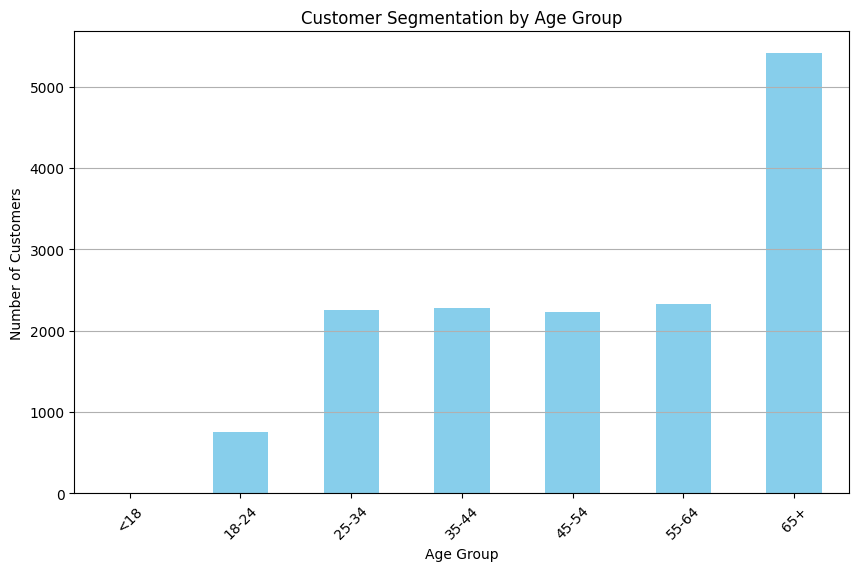

In [14]:
import matplotlib.pyplot as plt

# Customer segmentation visualization
age_group_counts = customers['AgeGroup'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


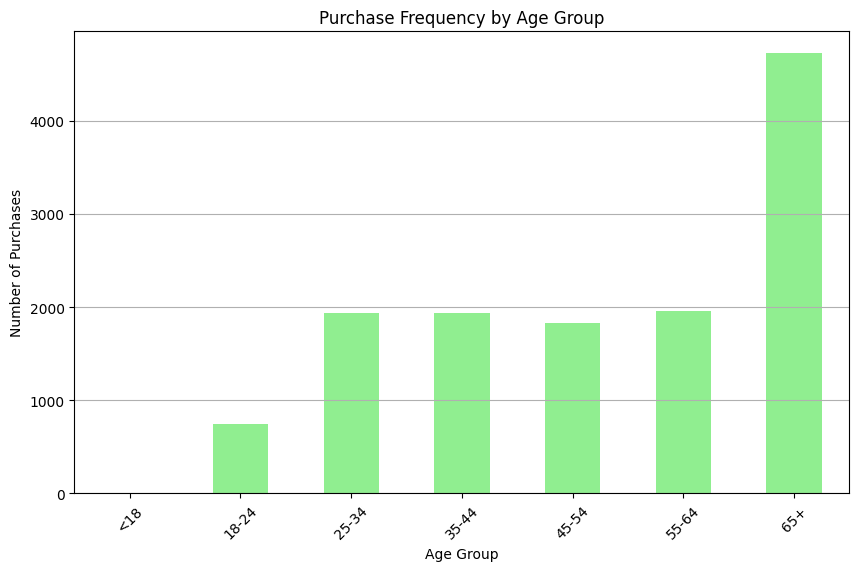

In [15]:
# Purchase frequency visualization
purchase_frequency.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title('Purchase Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


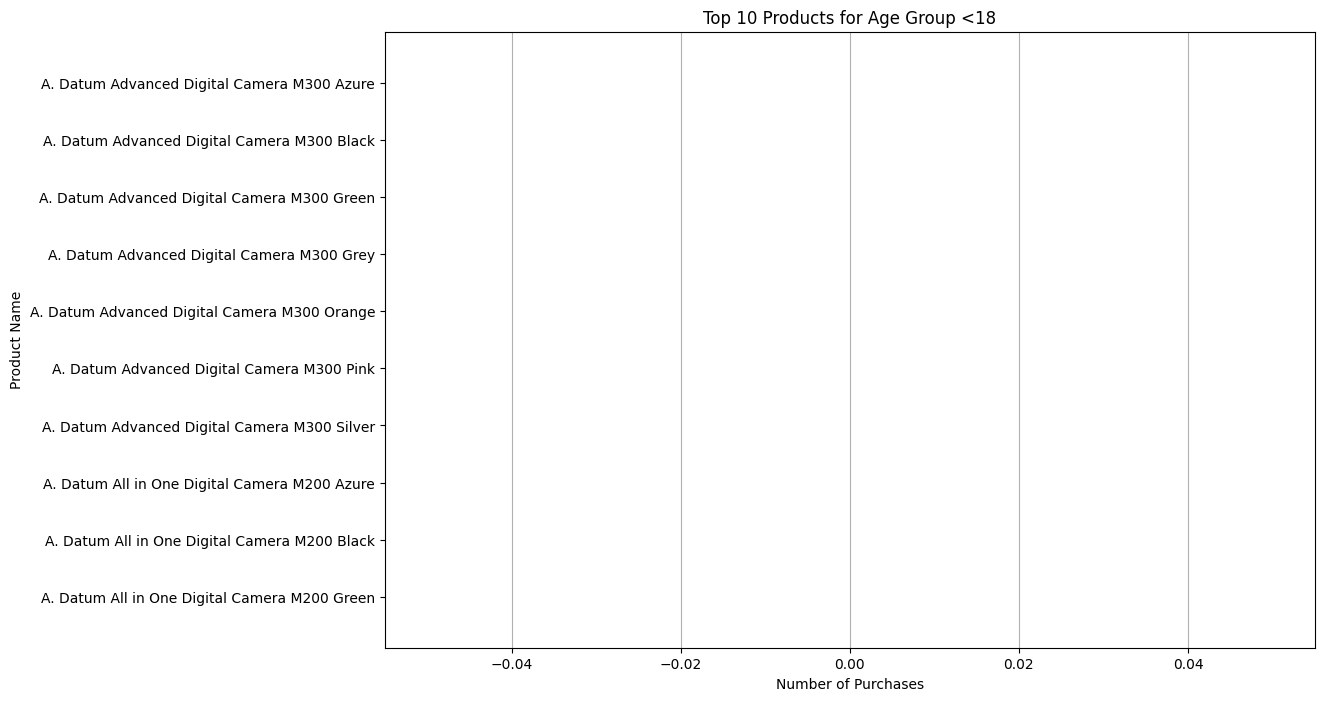

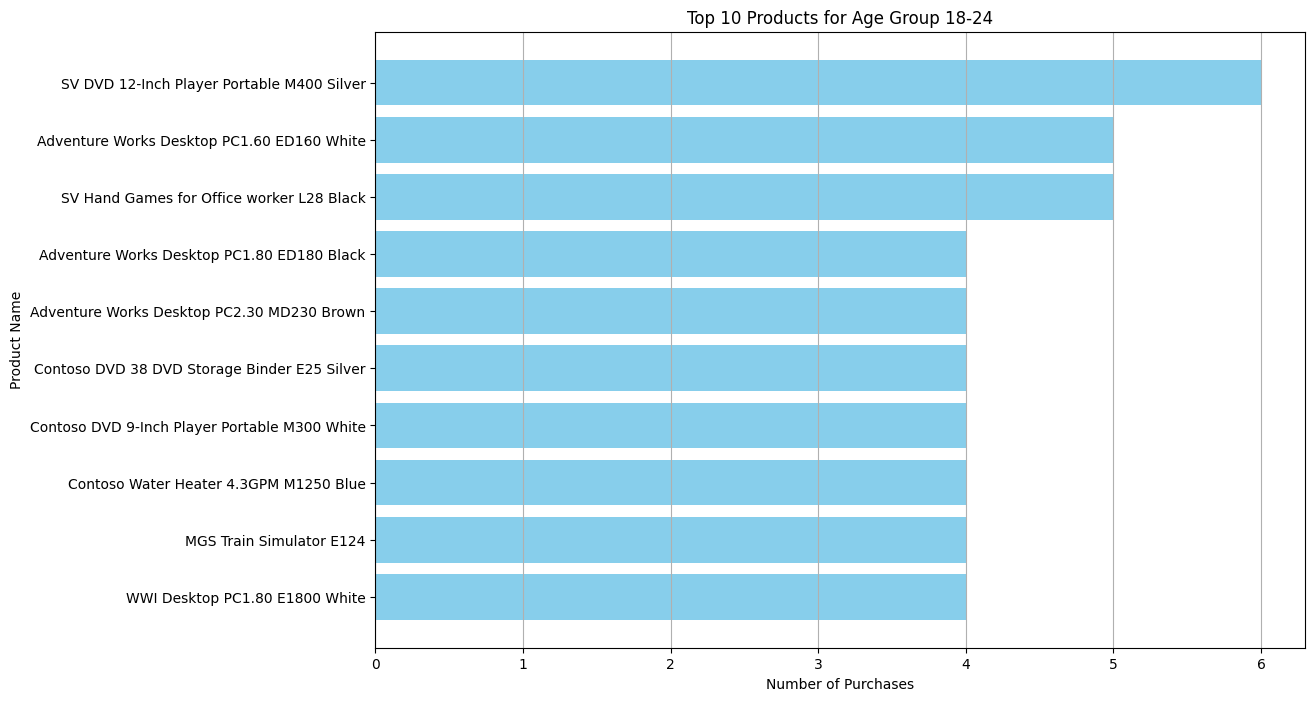

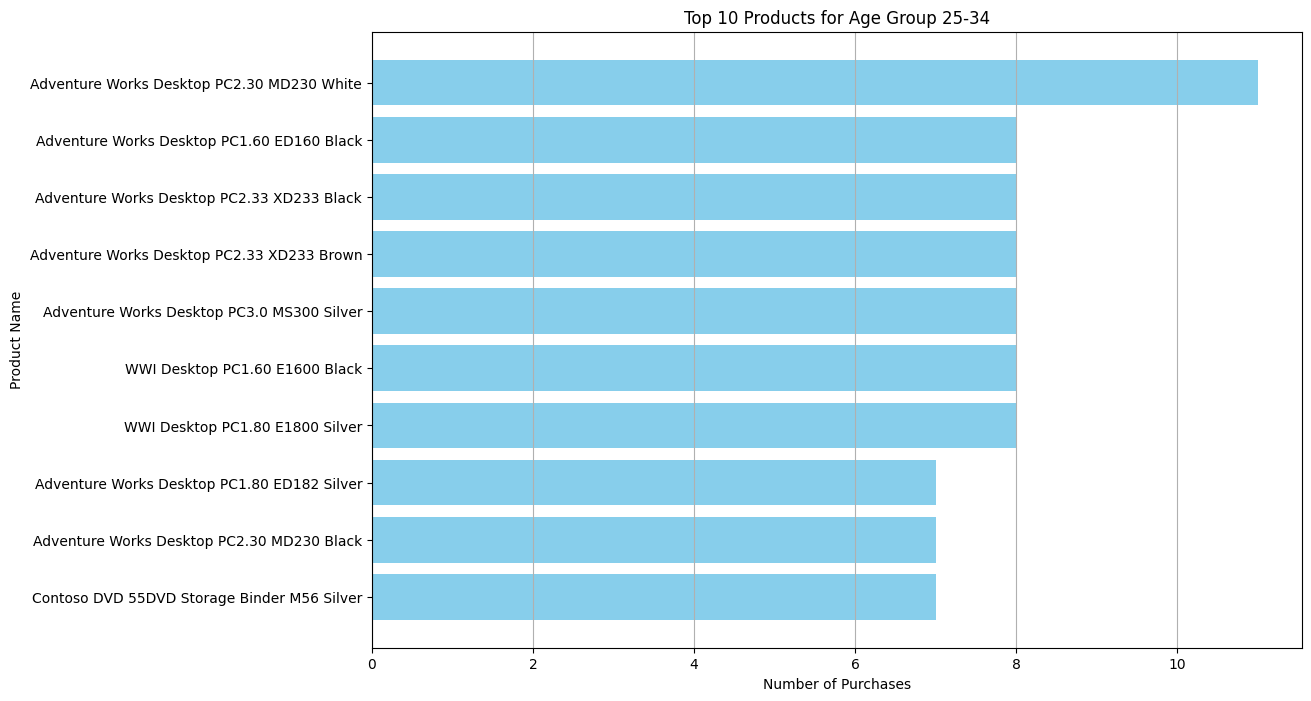

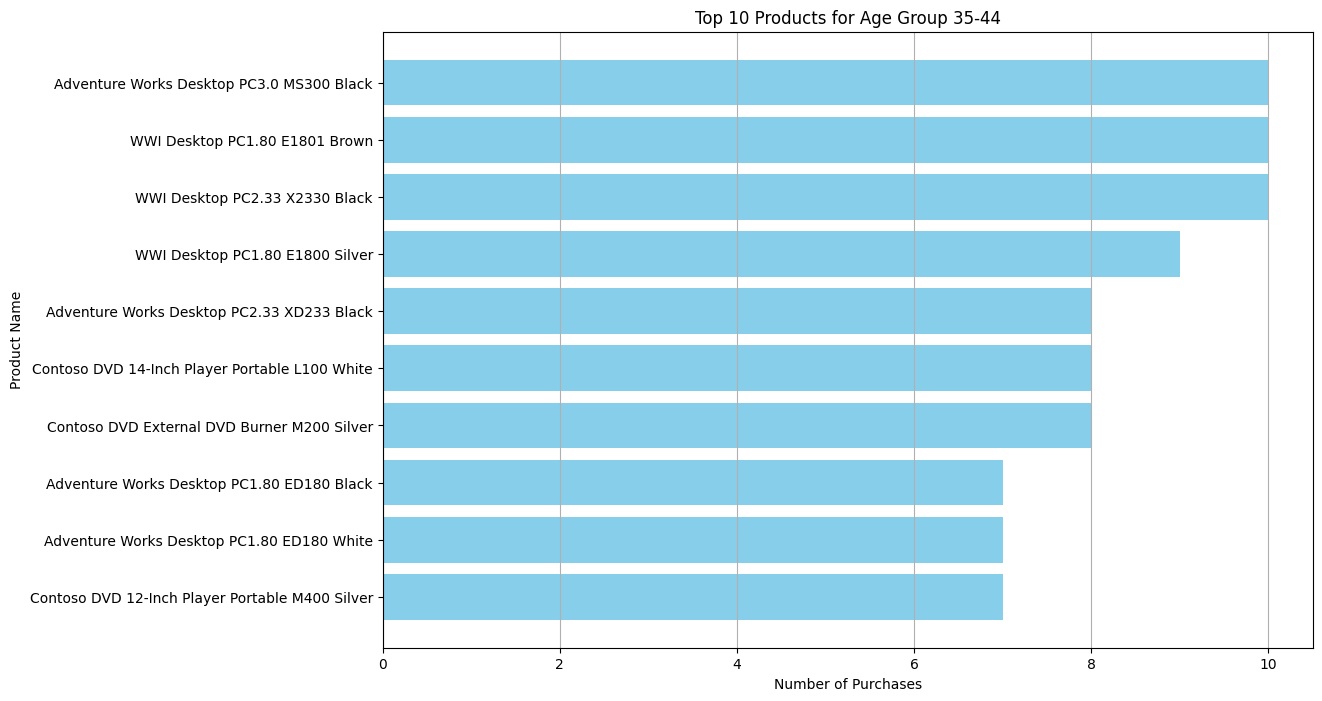

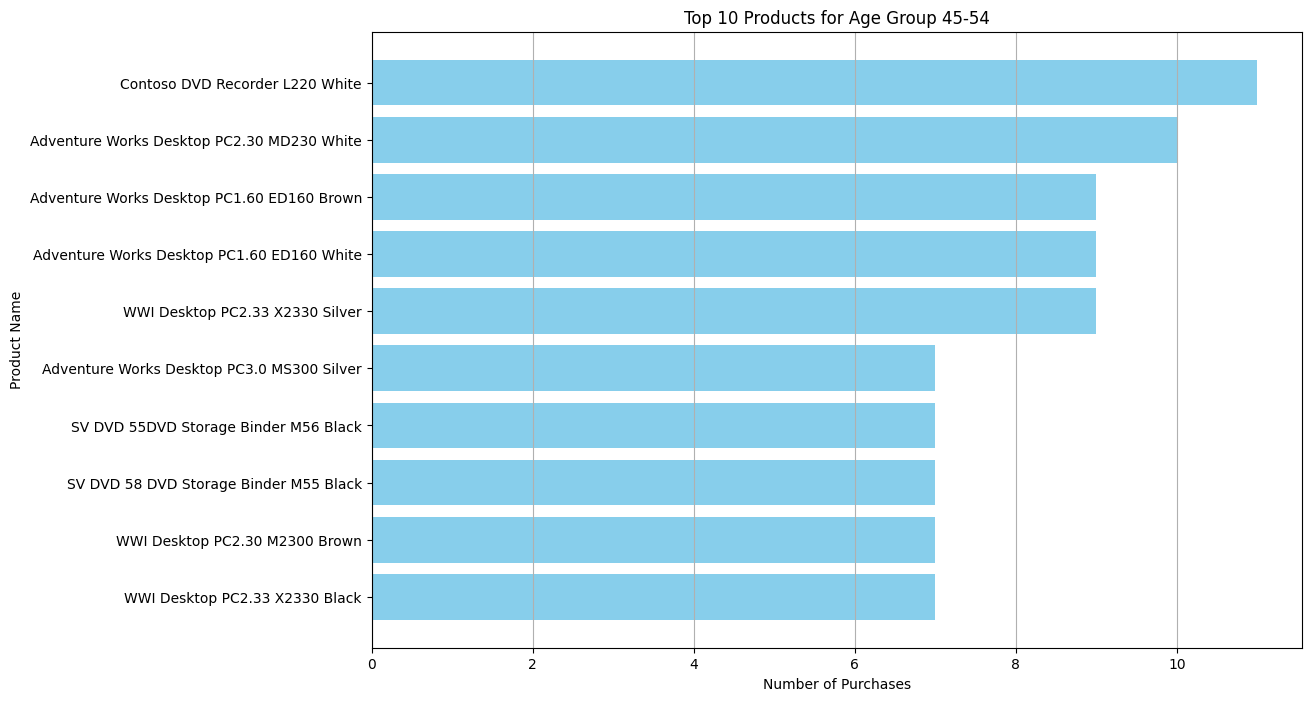

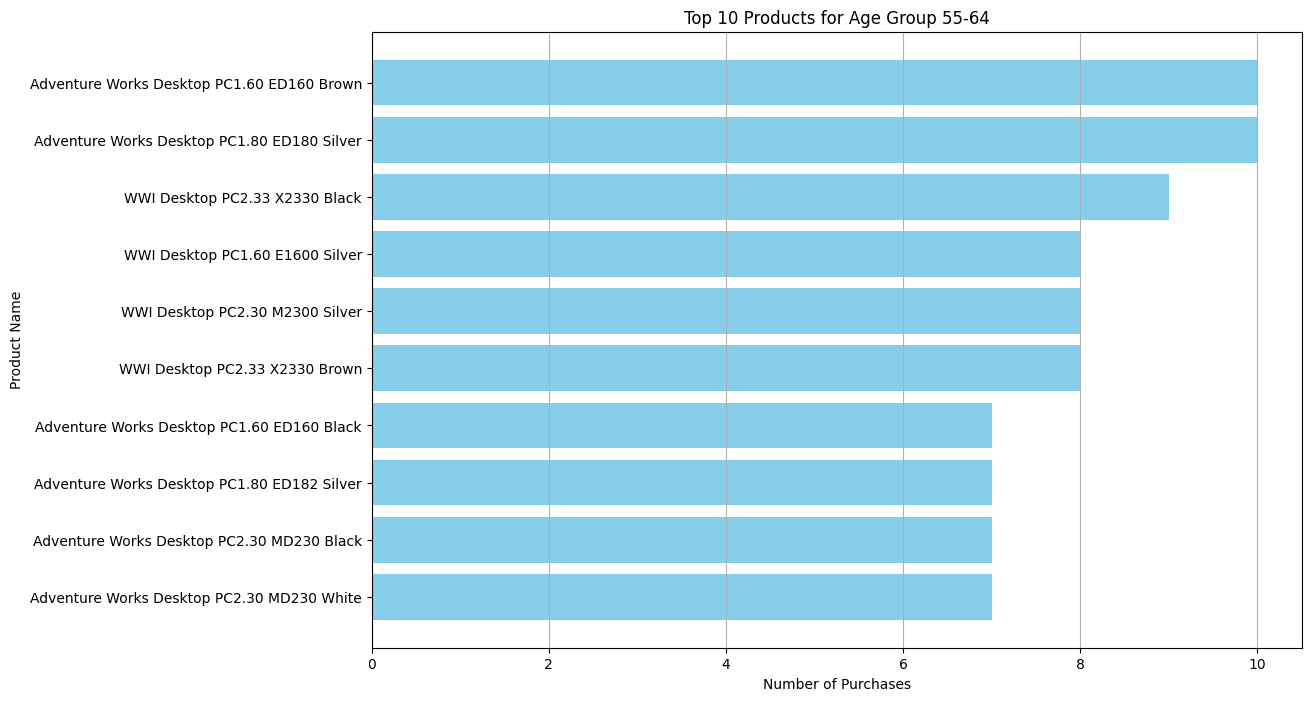

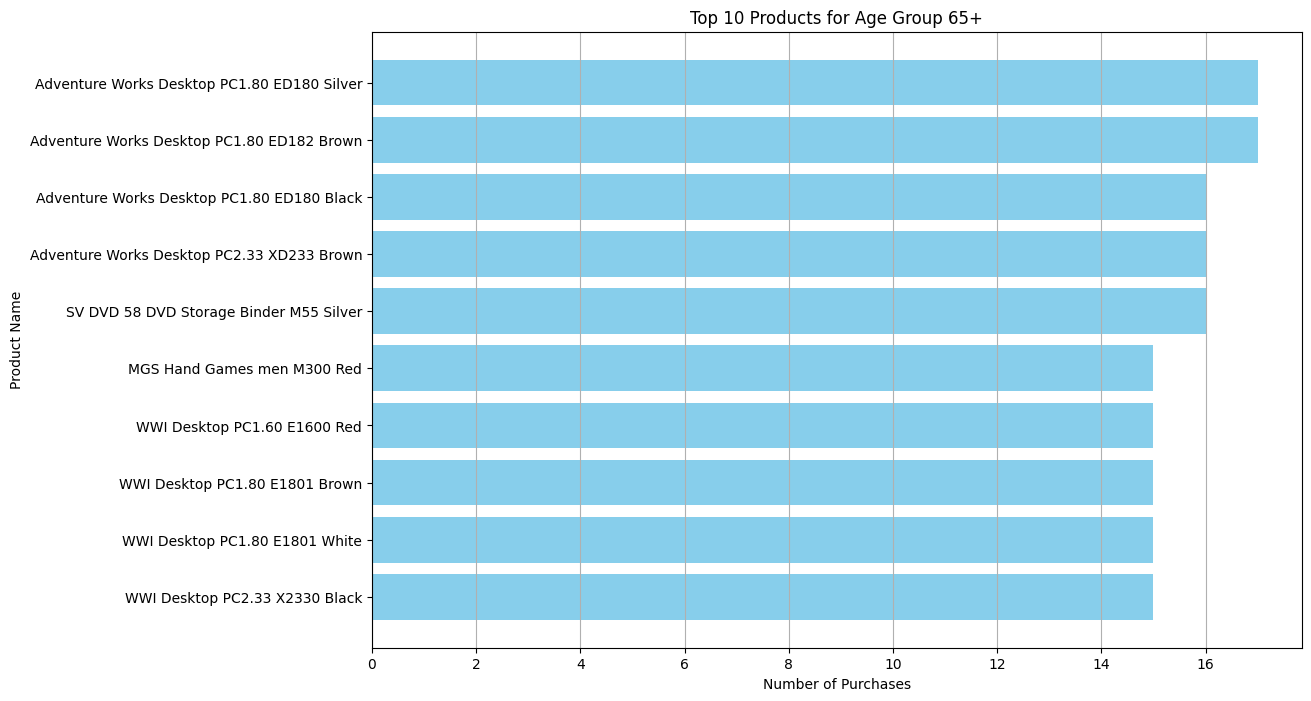

In [19]:


# Create a bar chart for each age group
for age_group in labels:
    top_products_age_group = top_products[top_products['AgeGroup'] == age_group].head(10)  # Taking top 10 products
    if not top_products_age_group.empty:
        products = top_products_age_group['Product_Name']
        counts = top_products_age_group['Count']

        plt.figure(figsize=(12, 8))
        plt.barh(products, counts, color='skyblue')
        plt.xlabel('Number of Purchases')
        plt.ylabel('Product Name')
        plt.title(f'Top 10 Products for Age Group {age_group}')
        plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
        plt.grid(axis='x')
        plt.show()


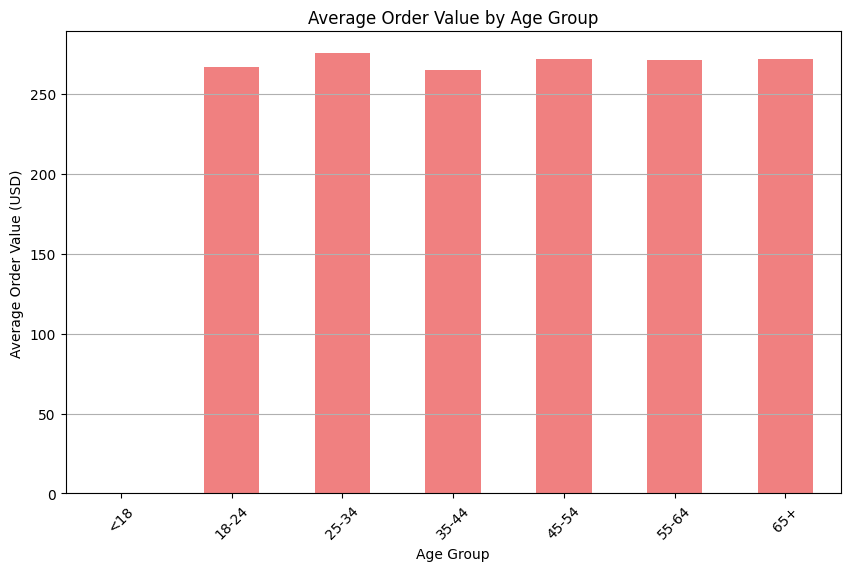

In [11]:
# Average order value visualization
average_order_value.plot(kind='bar', color='lightcoral', figsize=(10, 6))
plt.title('Average Order Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Order Value (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


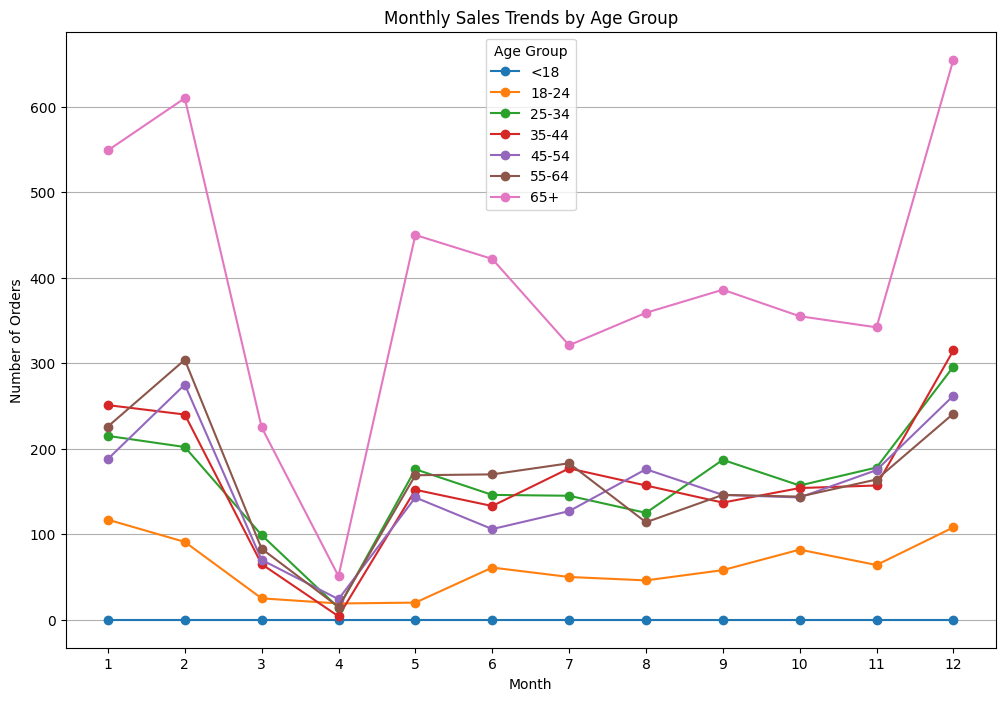

In [12]:
# Seasonal trends visualization
seasonal_trends.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Monthly Sales Trends by Age Group')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.legend(title='Age Group')
plt.show()
